In [359]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

# Load data

In [360]:
# Load data from sql
def load_data(query: str) -> pd.DataFrame:
    # Load environment variables from .env file
    # Gunakan path relatif dari notebook directory
    env_path = os.path.join("..", ".env")
    load_dotenv(dotenv_path=env_path)

    # Retrieve database connection parameters from environment variables
    DB_USER = os.getenv("DB_USER")
    DB_PASSWORD = os.getenv("DB_PASSWORD")
    DB_HOST = os.getenv("DB_HOST")
    DB_PORT = os.getenv("DB_PORT")
    DB_NAME = os.getenv("DB_NAME")

    engine = create_engine(
        f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
    )
    with engine.connect() as connection:
        df = pd.read_sql_query(query, connection)
        return df
    
# Example usage
query = "SELECT * FROM raw.pharmacy_sales;"

In [361]:
pd.set_option('display.max_columns', None)
df = load_data(query=query)

# Feature Engineering

In [362]:
# Map month from names to numbers
def month_mapping(df):
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['month'] = df['month'].map(month_map)
    return df
df = month_mapping(df)

In [363]:
df.head()

,distributor,customer_name,city,country,latitude,longitude,channel,sub_channel,product_name,product_class,quantity,price,sales,month,year,sales_rep_name,manager,sales_team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368.0,1472.0,1,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591.0,4137.0,1,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66.0,1980.0,1,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435.0,2610.0,1,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458.0,9160.0,1,2018,Anne Wu,Britanny Bold,Delta


# Data Visualization

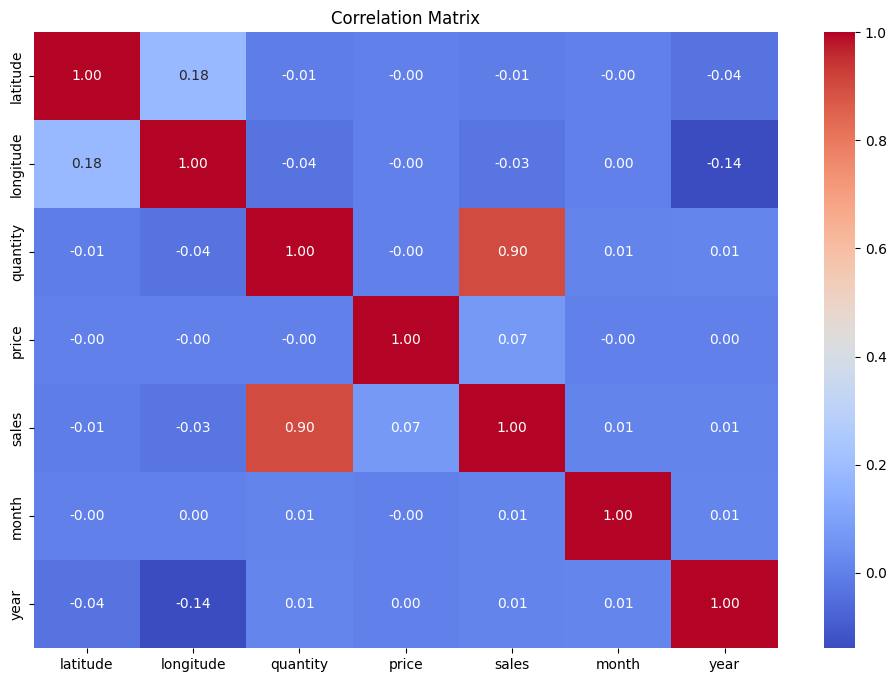

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

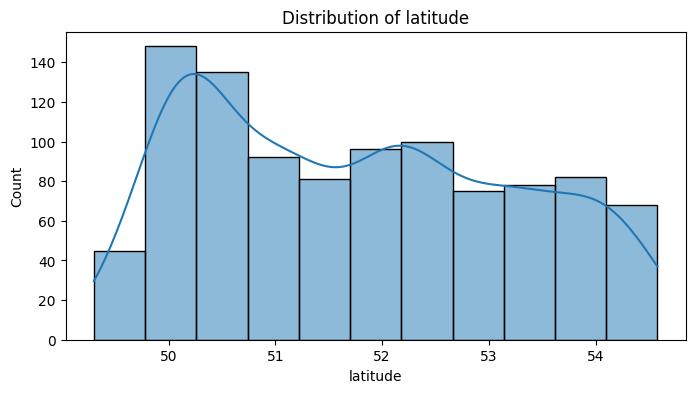

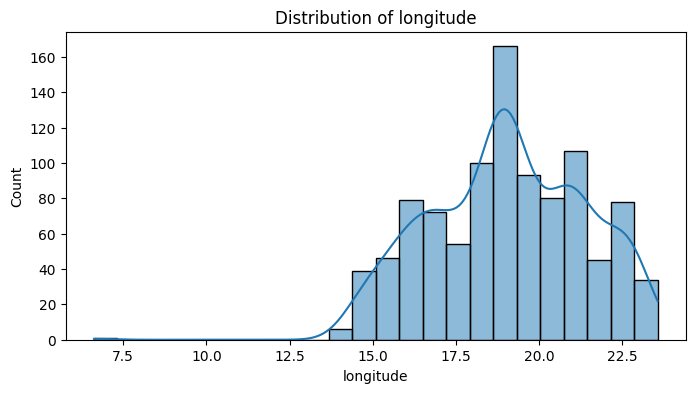

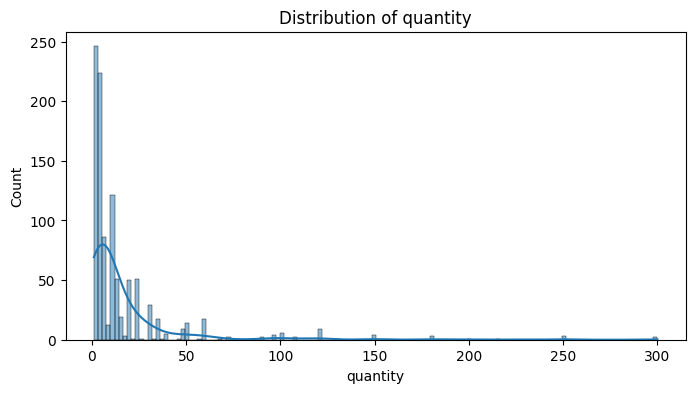

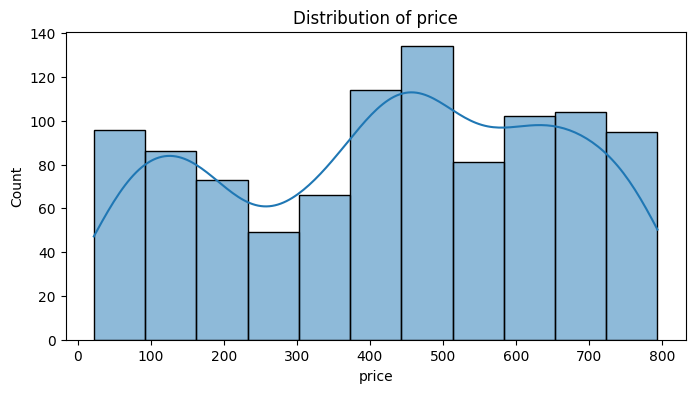

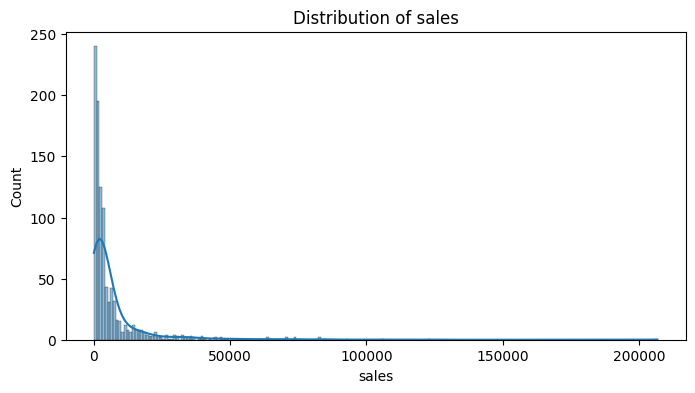

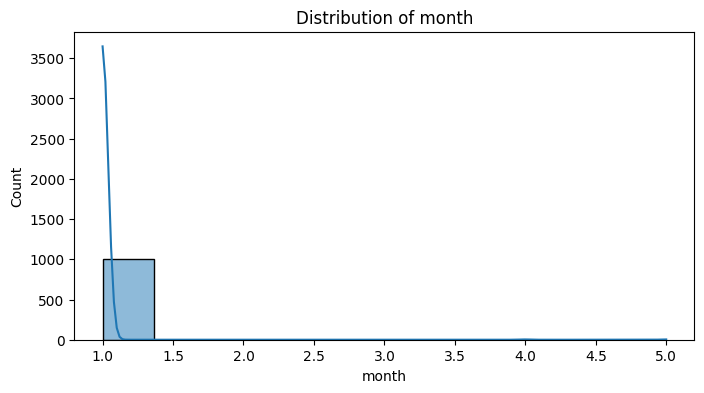

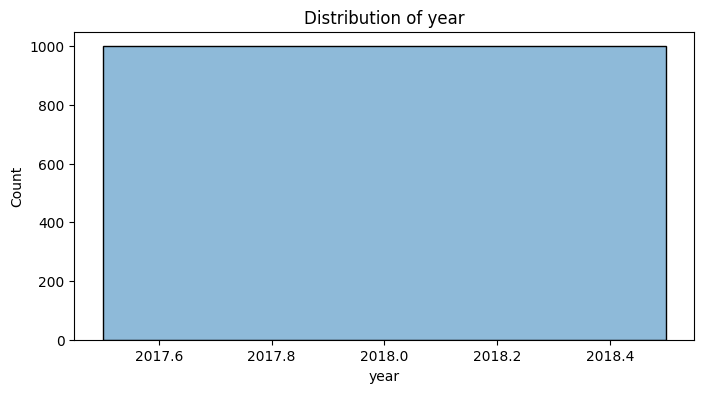

In [365]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].head(1000), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

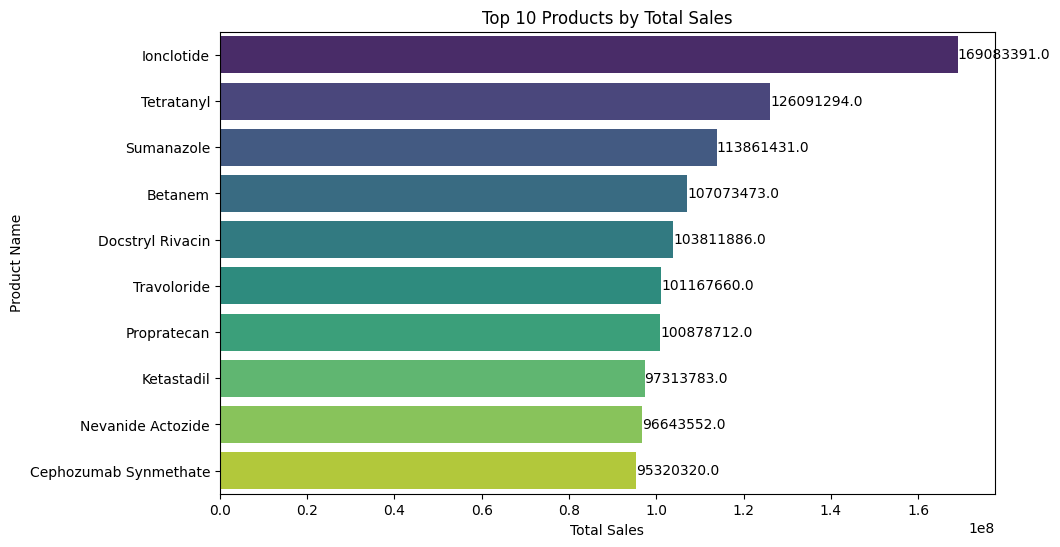

In [366]:
# Top 10 product by total sales
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
for i, v in enumerate(top_products.values):
    plt.text(v + 0.01, i, str(round(v, 2)), color='black', va='center')
plt.show()

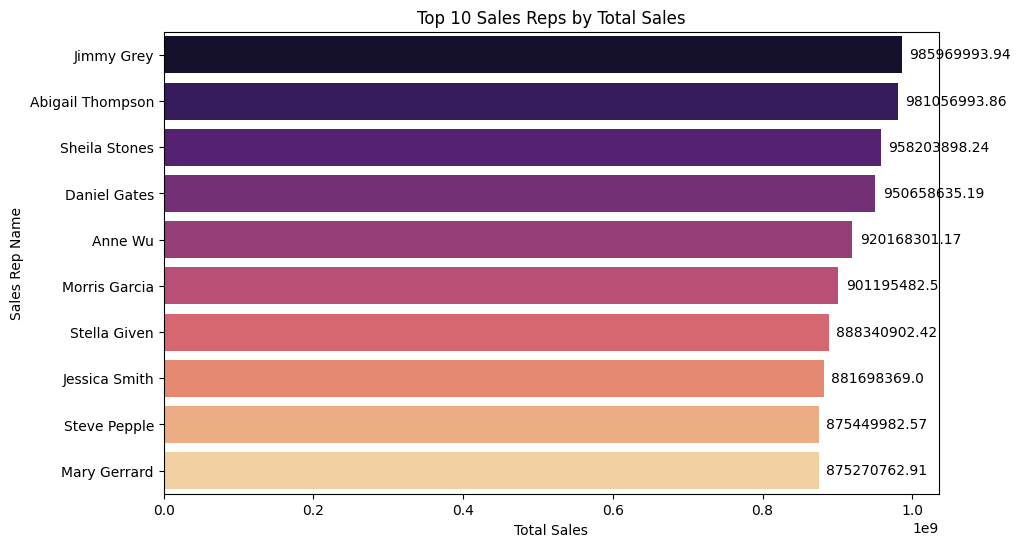

In [367]:
# Top 10 sales rep by total sales
top_sales_reps = df.groupby('sales_rep_name')['sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sales_reps.values, y=top_sales_reps.index, palette='magma')
plt.title('Top 10 Sales Reps by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sales Rep Name')
# Add data labels
for i, v in enumerate(top_sales_reps.values):
    plt.text(v + 0.01 * max(top_sales_reps.values), i, str(round(v, 2)), color='black', va='center')
plt.show()

In [368]:
df.head()

,distributor,customer_name,city,country,latitude,longitude,channel,sub_channel,product_name,product_class,quantity,price,sales,month,year,sales_rep_name,manager,sales_team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368.0,1472.0,1,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591.0,4137.0,1,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66.0,1980.0,1,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435.0,2610.0,1,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458.0,9160.0,1,2018,Anne Wu,Britanny Bold,Delta


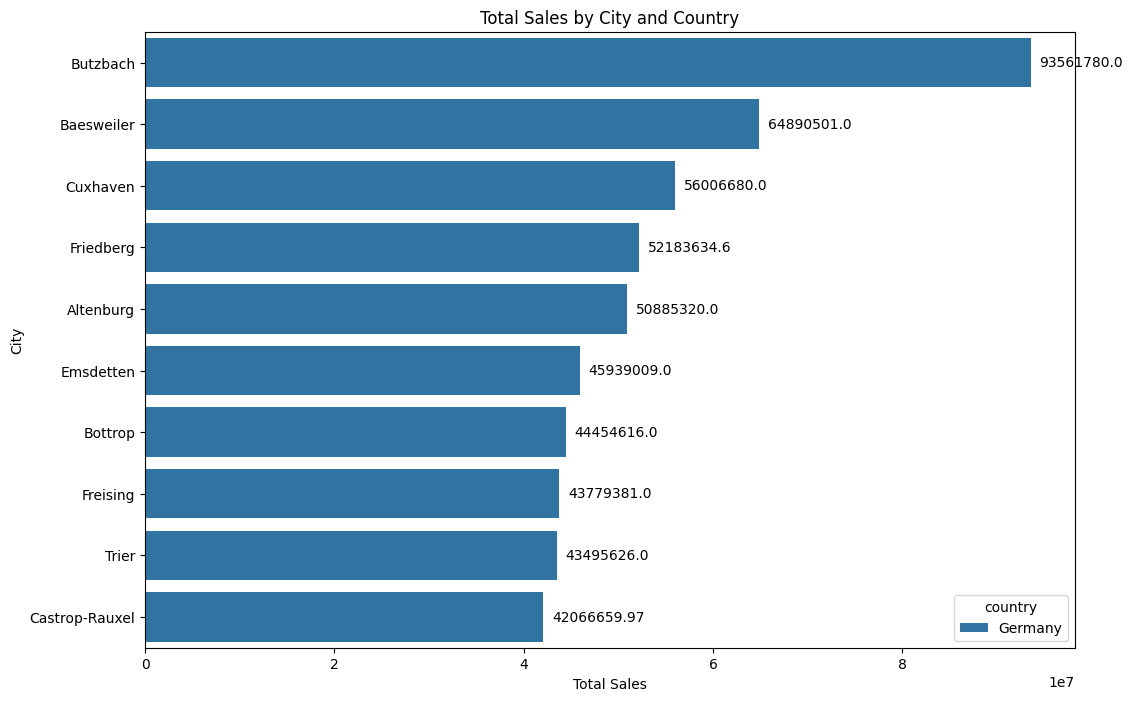

In [369]:
# Distribution of sales by city, country
region_sales = df.groupby(['country', 'city'])['sales'].sum().reset_index().sort_values(by='sales', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=region_sales, x='sales', y='city', hue='country', dodge=False)
plt.title('Total Sales by City and Country')
plt.xlabel('Total Sales')
plt.ylabel('City')
for i, v in enumerate(region_sales['sales']):
    plt.text(v + 0.01 * max(region_sales['sales']), i, str(round(v, 2)), color='black', va='center')
plt.show()

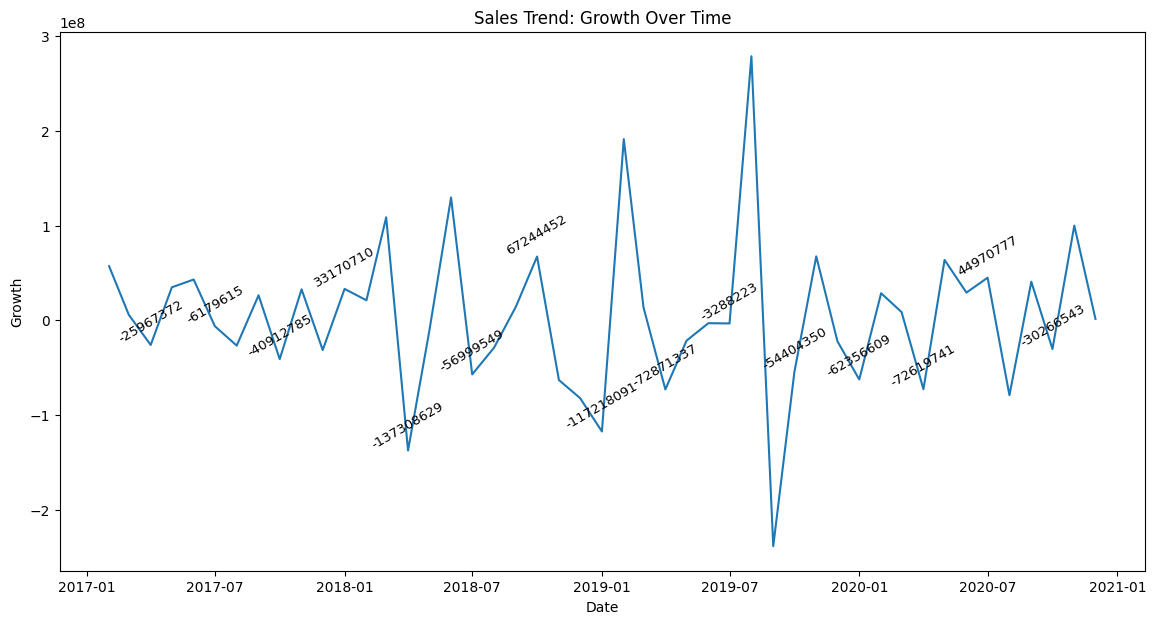

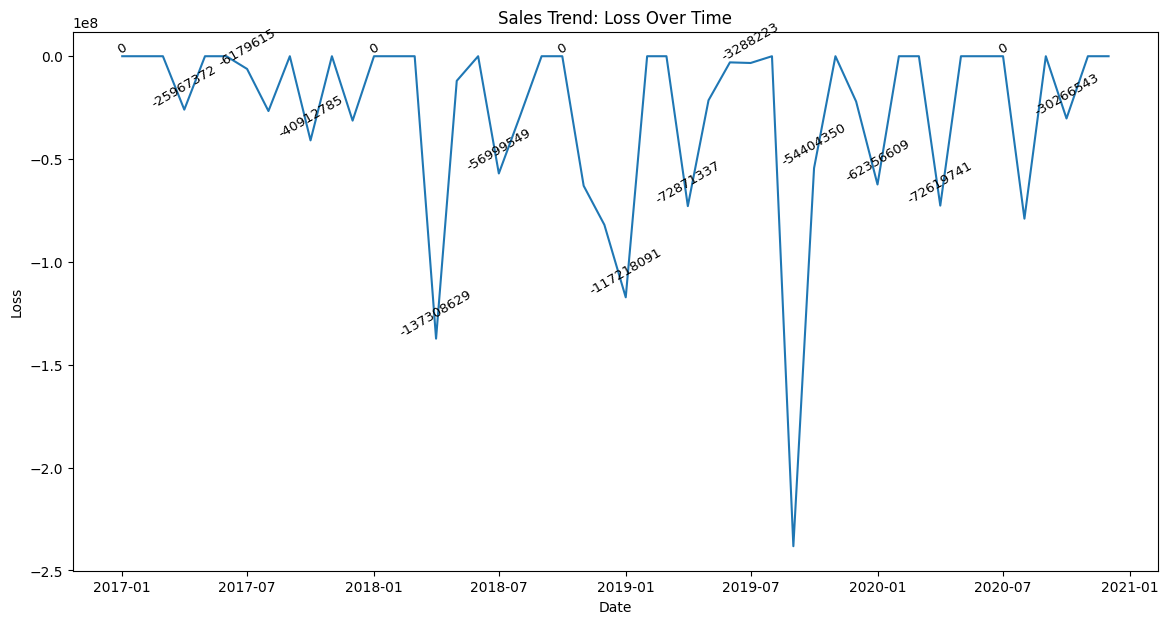

In [370]:
# Function for count agregation sales trend (sum, mean, meadian, growth, loss)

def sales_trend_analysis(df):
    df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')
    trend = df.groupby('date')['sales'].agg(['sum', 'mean', 'median']).reset_index()
    trend['growth'] = trend['sum'].diff()
    trend['loss'] = trend['growth'].apply(lambda x: x if x < 0 else 0)
    return trend

# usage and visualize
sales_trend = sales_trend_analysis(df)

for col in ['growth', 'loss']: # we can modified to call other columns like sum, mean, median
    plt.figure(figsize=(14, 7))
    ax = sns.lineplot(data=sales_trend, x='date', y=col)
    plt.title(f'Sales Trend: {col.capitalize()} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col.capitalize())
    # only show annotation on every 3rd month point
    for i, (x, y) in enumerate(zip(sales_trend['date'], sales_trend[col])):
        if i % 3 == 0: # show per trimester
            plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=9.5, color='black', rotation=30)
    plt.show()

# Feature Engineering

In [371]:
# Data preprocessing to add more features like sales_growth_pct, rolling_avg_3m, lag_1_month, sales_volatility, 
def feature_engineering(df):
    df = df.sort_values(by=['product_name', 'year', 'month'])
    
    # Sales Growth Percentage
    df['sales_growth_pct'] = df.groupby('product_name')['sales'].pct_change()

    # 3-Month Rolling Average
    df['rolling_avg_3m'] = (df.groupby('product_name')['sales']
                            .rolling(window=3, min_periods=1)
                            .mean()
                            .reset_index(level=0, drop=True))

    # lag feature 1 month
    df['lag_1_month'] = df.groupby('product_name')['sales'].shift(1)

    # Sales Volatility (Standard Deviation over past 3 months)
    df['sales_volatility'] = df.groupby('product_name')['sales'].transform(lambda x: x.rolling(window=3).std())

    # Sales normalized by Price
    df['sales_clean'] = df['sales'].clip(lower=0)
    df['sales_zscore_price'] = ((df['sales_clean'] - df['sales_clean'].mean()) / df['sales_clean'].std())

    return df

df = feature_engineering(df)

In [372]:
# Handle missing values in the new features
def fill_missing_values(df):
    df['sales_growth_pct'] = df['sales_growth_pct'].fillna(df['sales_growth_pct'].median()).round(2)
    df['rolling_avg_3m'] = df['rolling_avg_3m'].fillna(df['rolling_avg_3m'].median()).round(2)
    df['lag_1_month'] = df['lag_1_month'].fillna(df['lag_1_month'].median()).round(2)
    df['sales_volatility'] = df['sales_volatility'].fillna(df['sales_volatility'].median()).round(2)
    return df

df = fill_missing_values(df)

# Data Encoding

In [373]:
# data encoding
from sklearn.preprocessing import LabelEncoder

df_clean = df.copy() # make a copy to preserve original data

# Encode categorical variables
le = LabelEncoder()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

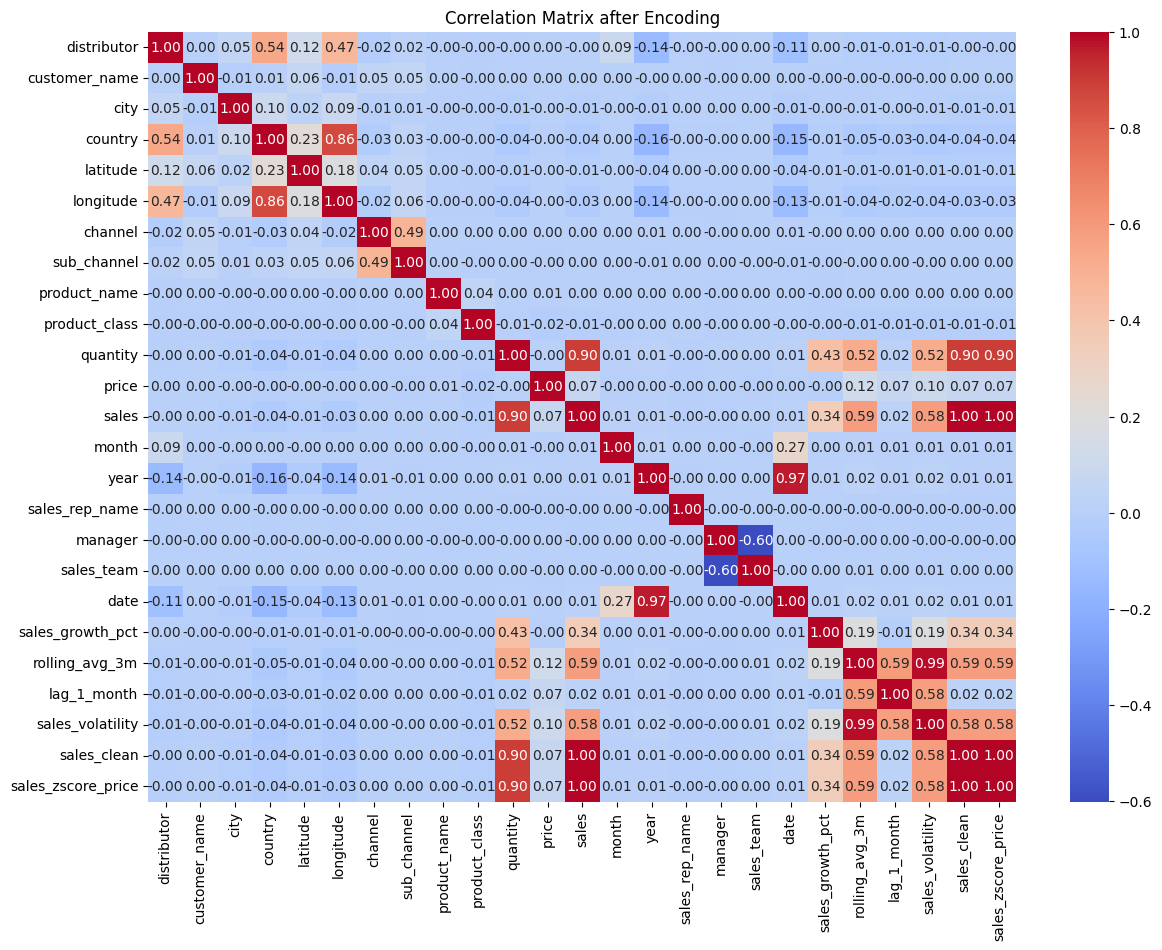

In [374]:
# Correlation matrix after encoding and cleaning
df_clean.corr()

# plotting
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix after Encoding')
plt.show()

In [375]:
df.head()

,distributor,customer_name,city,country,latitude,longitude,channel,sub_channel,product_name,product_class,quantity,price,sales,month,year,sales_rep_name,manager,sales_team,date,sales_growth_pct,rolling_avg_3m,lag_1_month,sales_volatility,sales_clean,sales_zscore_price
40588,Gerlach LLC,Heller-Abernathy Pharmaceutical Limited,Siegburg,Germany,50.8014,7.2044,Hospital,Private,Abatatriptan,Antibiotics,5.0,742.0,3710.0,1,2017,Jimmy Grey,Alisha Cordwell,Charlie,2017-01-01,0.00,3710.00,5850.0,11316.07,3710.0,-0.124226
41190,Gerlach LLC,"Pfannerstill, Upton and Balistreri Pharm",Ilmenau,Germany,50.6872,10.9142,Pharmacy,Institution,Abatatriptan,Antibiotics,10.0,742.0,7420.0,1,2017,Stella Given,Alisha Cordwell,Charlie,2017-01-01,1.00,5565.00,3710.0,11316.07,7420.0,-0.113584
41447,Erdman,Gibson-Hill,Troisdorf,Germany,50.8161,7.1556,Pharmacy,Retail,Abatatriptan,Antibiotics,20.0,742.0,14840.0,1,2017,Stella Given,Alisha Cordwell,Charlie,2017-01-01,1.00,8656.67,7420.0,5667.12,14840.0,-0.092298
41861,Gerlach LLC,Dach Ltd Pharm,Saarlouis,Germany,49.3167,6.7500,Pharmacy,Retail,Abatatriptan,Antibiotics,5.0,742.0,3710.0,1,2017,Stella Given,Alisha Cordwell,Charlie,2017-01-01,-0.75,8656.67,14840.0,5667.12,3710.0,-0.124226
41875,Gerlach LLC,Buckridge-Davis Pharmaceutical Ltd,Herne,Germany,51.5426,7.2190,Pharmacy,Retail,Abatatriptan,Antibiotics,24.0,742.0,17808.0,1,2017,Sheila Stones,Britanny Bold,Delta,2017-01-01,3.80,12119.33,3710.0,7432.36,17808.0,-0.083784
